## Exercise 5 - Classification using LR,KNN,NB


We'll be classification using Logistic, KNN and Naive Bayes and Compare them.


In [1]:
pip install pandas numpy matplotlib scikit-learn seaborn statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
)

1. Importing dataset and performing Exploratory Data Analysis


In [45]:
df = pd.read_csv("Default.csv")
df

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [46]:
df.dtypes

Unnamed: 0      int64
default        object
student        object
balance       float64
income        float64
dtype: object

2. Converting Categorical columns into Numerical


In [ ]:
for col in df.select_dtypes("object"):
    print(df[col].value_counts())

default
No     9667
Yes     333
Name: count, dtype: int64
student
No     7056
Yes    2944
Name: count, dtype: int64


In [112]:
df.dtypes

Unnamed: 0      int64
default         int64
student         int64
balance       float64
income        float64
dtype: object

<Axes: xlabel='income', ylabel='balance'>

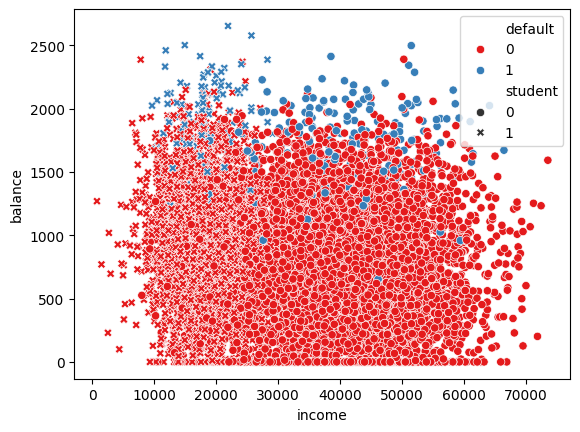

In [ ]:
sns.scatterplot(
    data=df, x="income", y="balance", hue="default", style="student", palette="Set1"
)

In [ ]:
LE = LabelEncoder()
for col in df.select_dtypes("object"):
    df[col] = LE.fit_transform(df[col])


scaler = StandardScaler()
df[["income", "balance"]] = scaler.fit_transform(df[["income", "balance"]])

<Axes: xlabel='income', ylabel='balance'>

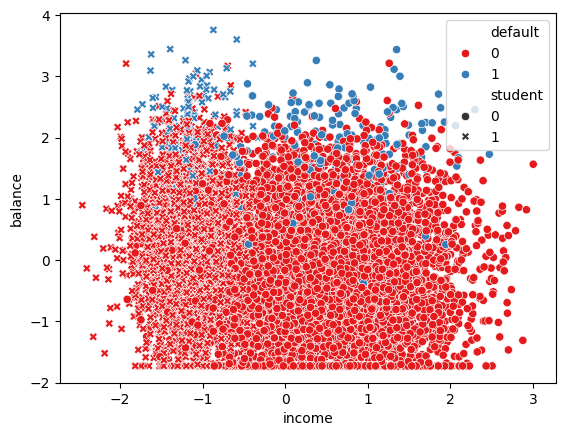

In [ ]:
sns.scatterplot(
    data=df, x="income", y="balance", hue="default", style="student", palette="Set1"
)

In [125]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,0,0,-0.218835,0.813187
1,2,0,1,-0.037616,-1.605496
2,3,0,0,0.492410,-0.131212
3,4,0,0,-0.632893,0.164031
4,5,0,0,-0.102791,0.370915


3. Splitting the dataset


In [ ]:
X = df[["student", "balance", "income"]]
y = df["default"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

4. Initializing models


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN (K=1)": KNeighborsClassifier(n_neighbors=1),
    "Naive Bayes": GaussianNB(),
}

# Store results

metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall (Sensitivity)": [],
    "Specificity": [],
    "F1-Score": [],
    "AUC": [],
}
conf_matrices = {}
roc_curves = {}

5. Fitting the models


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(tn, fp, fn, tp, (tn / (tn + fp)) if (tn + fp) > 0 else 0)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)  # Sensitivity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)

    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall (Sensitivity)"].append(recall)
    metrics["Specificity"].append(specificity)
    metrics["F1-Score"].append(f1)
    metrics["AUC"].append(auc)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

    conf_matrices[name] = cm

4818 23 106 53 0.9952489155133237
4720 121 103 56 0.9750051642222681
4800 41 115 44 0.9915306754802726


6. Printing Confusion matrix of each model


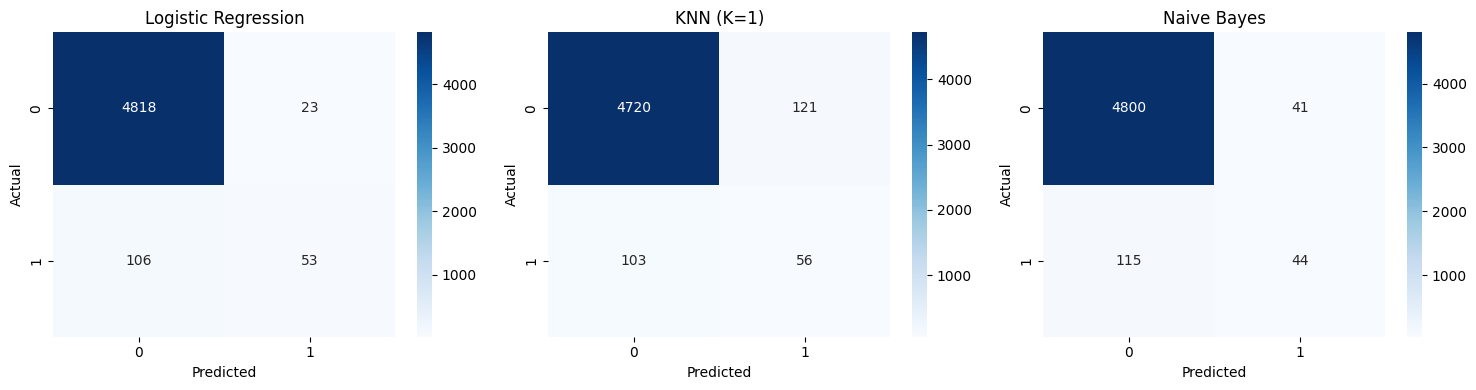

In [ ]:
fig, axes = plt.subplots(1, len(models), figsize=(15, 4))
for ax, (name, cm) in zip(axes, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(name)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

7. Comparing accuracy of each


/tmp/ipykernel_7645/1152215904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, ax=axes[i], palette="viridis")
/tmp/ipykernel_7645/1152215904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, ax=axes[i], palette="viridis")
/tmp/ipykernel_7645/1152215904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=metrics_df, ax=axes[i], palette="viridis")
/tmp/ipykernel_7645/1152215904.py:8: FutureWarning: 

Passing `palette` without assigning `

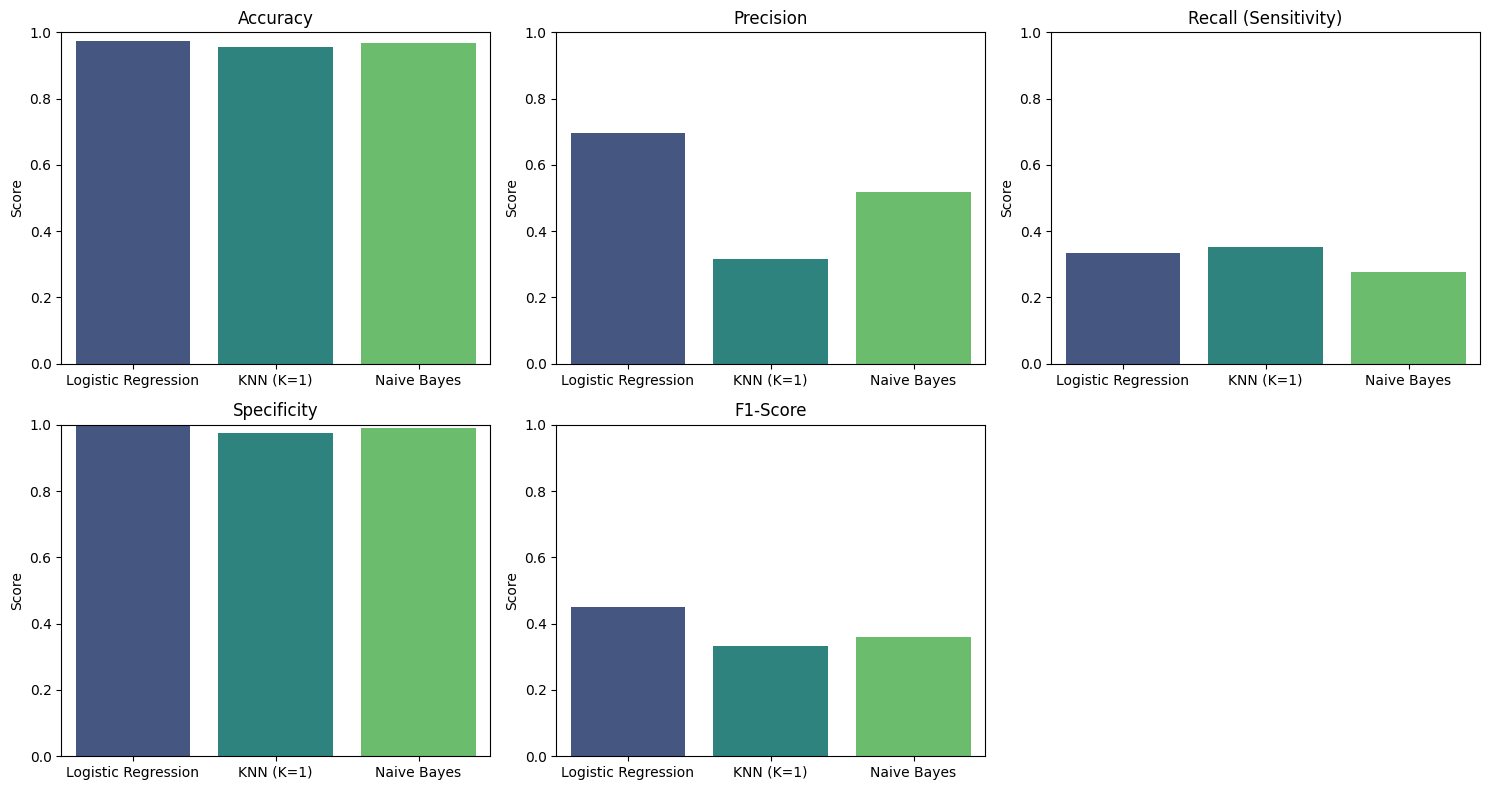

In [ ]:
metrics_df = pd.DataFrame(metrics)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()
metric_names = [
    "Accuracy",
    "Precision",
    "Recall (Sensitivity)",
    "Specificity",
    "F1-Score",
]

for i, metric in enumerate(metric_names):
    sns.barplot(x="Model", y=metric, data=metrics_df, ax=axes[i], palette="viridis")
    axes[i].set_ylim(0, 1)
    axes[i].set_title(metric)
    axes[i].set_ylabel("Score")
    axes[i].set_xlabel("")

fig.delaxes(axes[-1])  # Remove unused subplot
plt.tight_layout()
plt.show()

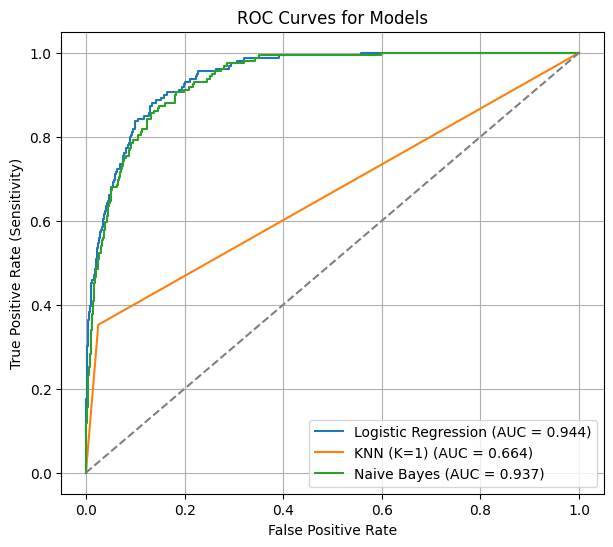

In [132]:
plt.figure(figsize=(7, 6))
for name, (fpr, tpr) in roc_curves.items():
    auc_val = metrics_df.loc[metrics_df["Model"] == name, "AUC"].values[0]
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curves for Models")
plt.legend()
plt.grid(True)
plt.show()

### Model Performance Summary

- **Accuracy** for all three models (**Logistic Regression**, **Naive Bayes**, **KNN**) is approximately the same.
- **Logistic Regression** consistently achieves the **highest** values in:
  - Precision
  - Recall (Sensitivity)
  - F1-Score  
    This indicates that Logistic Regression is better at correctly identifying defaults while maintaining fewer false positives.
- **Naive Bayes** performs moderately well across all metrics, ranking **second** in most cases.
- **KNN (K=1)** ranks **last** in Precision, Recall, and F1-Score, showing poorer balance between detecting defaults and avoiding false positives.
- **AUC (Area Under ROC Curve)**:
  - Logistic Regression and Naive Bayes have **higher** AUC values, indicating better overall discriminative ability.
  - KNN’s AUC is **significantly lower**, suggesting weaker probability-based classification performance.
- **Overall Conclusion**:  
  Logistic Regression provides the most reliable and well-balanced classification results for this dataset, while KNN performs the weakest among the three.
